# Lab. K-means 

## Grupo:

### Arthur Lopes Sabioni
### Júlia Bindi Alencar de Jesus

## Exercício 1 

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

a) Executar o algoritmo K-means para obter 3 clusters das amostras
presentes no arquivo “data2.mat”, conforme Figura 1. 

In [ ]:
data = scipy.io.loadmat("./data/data2.mat")['X']

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
pred = kmeans.predict(data)

# Plot cluster separation and center
plt.scatter(data[:, 0], data[:, 1], c=pred, marker='o')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c="black")
plt.show()

c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


b) Agora ajuste o algoritmo K-Means para diferentes números de clusters
(1 a 20).

c) Para cada modelo, armazene o número de clusters e o valor da inércia
(custo).

In [3]:
inertia_x_num_clusters = []
for i in range(1,21):
    inertia = KMeans(n_clusters=i).fit(data).inertia_
    inertia_x_num_clusters.append(inertia)

c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

d) Plote a Inércia (custo) versus Nº de clusters. Parece haver um número
ideal de cluster (método do cotovelo - elbow?


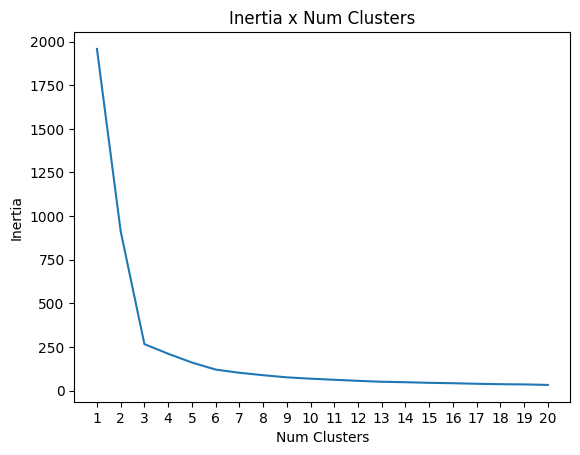

In [4]:
plt.title("Inercia x Numero de Clusters")
plt.xticks(range(1,21))
plt.xlabel("Numero de Cluster")
plt.ylabel("Inercia")
plt.plot(range(1,21), inertia_x_num_clusters)

Pelo método do cotovelo, o ponto que gera a maior inflexão seria o com 3 clusters, sendo este o número ideal de clusters.

e) Ajuste um modelo de agrupamento aglomerativo hierárquico
(Hierarchical Agglomerative Clustering) com três clusters (escolha e
teste diferentes tipos de linkage).

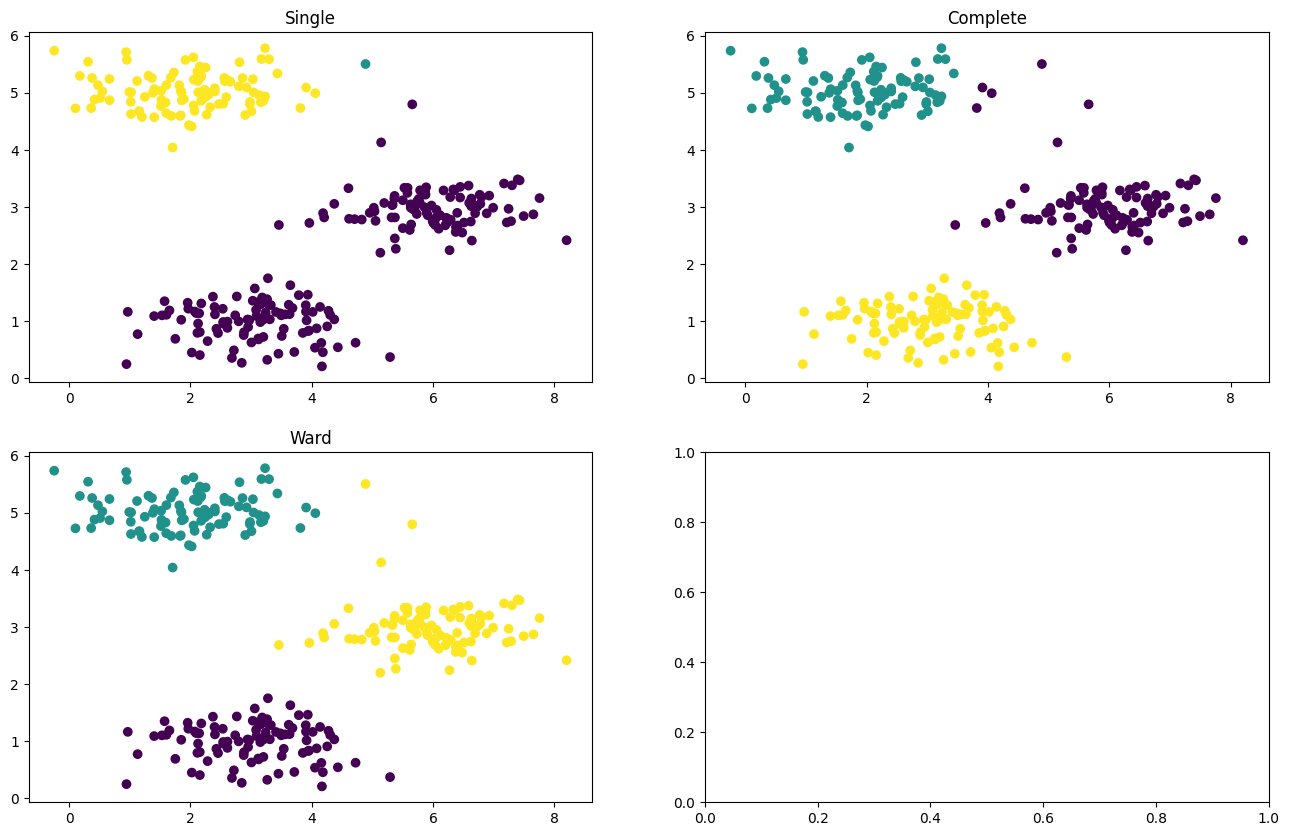

In [5]:
from sklearn.cluster import AgglomerativeClustering

agg_models = []
linkages = ["single", "complete", "ward"]
for linkage in linkages:
    model_prediction = AgglomerativeClustering(n_clusters=3, linkage=linkage).fit_predict(data)
    agg_models.append((model_prediction, linkage))

fig, ax = plt.subplots(2, 2, figsize=(16, 10))
for i, ax in enumerate(fig.axes):
    if i != 3:
        ax.set_title(agg_models[i][1].capitalize())
        ax.scatter(data[:, 0], data[:, 1], c=agg_models[i][0], marker='o')

f) Compare os resultados com os obtidos pelo k-means.


Entre os modelos com diferentes tipos de ligações, o único que se destaca do K-means é o método de single linkage. Nesse método, um cluster é formado por um único elemento e os dois conjuntos mais próximos são agrupados em um único cluster.

Essa distinção ocorre porque, ao contrário do K-means, que compara a distância de cada elemento ao centróide do cluster, o agrupamento aglomerativo hierárquico utiliza a distância entre os clusters como medida de comparação. O cálculo dessa distância varia de acordo com o tipo de ligação utilizado. No caso do single linkage, a distância entre grupos é determinada pela menor distância entre um par de elementos, um de cada grupo.

Embora o K-means e o agrupamento aglomerativo hierárquico compartilhem semelhanças, é a forma de comparação e cálculo das distâncias que os diferenciam significativamente.

g) Visualize o dendrograma produzido pelo método de agrupamento
aglomerativo Dica: O SciPy tem um módulo chamado cluster.hierarchy
que contém as funções de linkage e dendrogram necessárias para
criar o mapa de ligação (linkage) e traçar o dendrograma resultante.


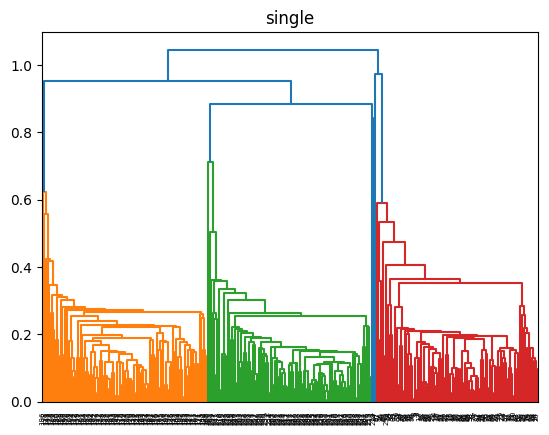

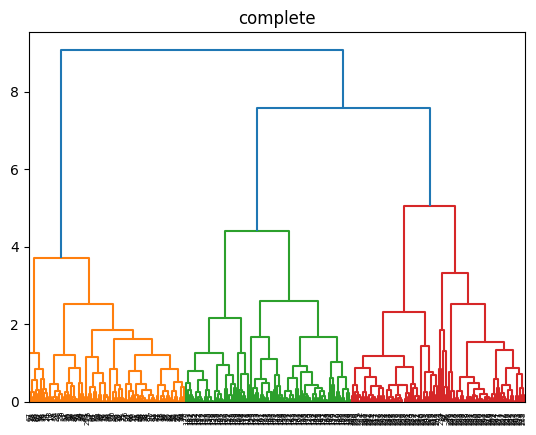

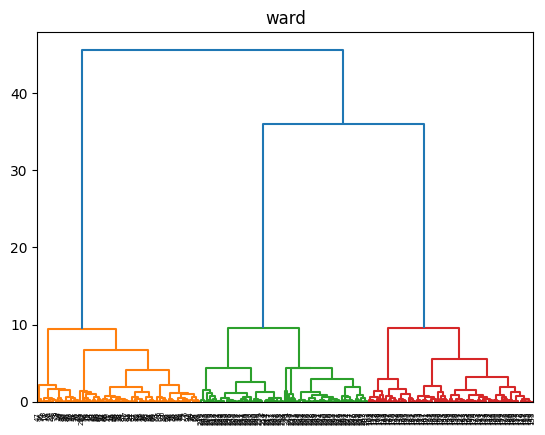

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

for l in linkages:
    plt.title(l)
    dendrogram(linkage(data, l))
    plt.show()

## Exercício 2

Neste exercício, você aplicará k-means para comprimir uma imagem. Em uma
representação direta de cores com 24 bits de uma imagem (Figura 2,
bird_small.png.mat e bird_small.png), cada pixel é representado por três
valores inteiros sem sinal de 8 bits (variando de 0 a 255) que especificam os
valores de intensidade vermelha, verde e azul. Essa codificação é
frequentemente referenciada como codificação RGB. Nossa imagem contém
milhares de cores, e nesta parte do exercício, você reduzirá o número de
cores para 16 cores.

Ao fazer essa redução, é possível representar (comprimir) a foto de forma
eficiente. Especificamente, você só precisa armazenar os valores RGB das 16
cores selecionadas, e para cada pixel a imagem você precisará apenas
armazenar o índice da cor daquele local (onde apenas 4 bits são necessários
para representar as 16 possibilidades).

Neste exercício, você usará o algoritmo k-means para selecionar as 16 cores
que serão usadas para representar a imagem compactada. Concretamente,
você tratará cada pixel da imagem original como um amostra (instância) de
dados e usará o algoritmo k-means para encontrar as 16 cores que melhor
agrupam (clusterizam) os pixels no espaço RGB. Uma vez que você tenha
computado os centroides dos clusters da imagem, você irá usar as 16 cores
para substituir os pixels da imagem original.

Depois de encontrar K = 16 cores para representar a imagem, você pode
atribuir cada posição de pixel ao seu centroide mais próximo. Observe que
você reduziu significativamente o número de bits necessários para descrever a
imagem. A imagem original exigia 24 bits para cada um dos 128×128 pixels,
resultando em tamanho total de 128×128×24 = 393.216 bits. A nova
representação requer um armazenamento na forma de um dicionário de 16
cores, sendo que cada uma delas requer 24 bits. No entanto, como a imagem
em si requer apenas 4 bits por pixel, o número final de bits utilizados será,
portanto, 16 × 24 + 128 × 128 × 4 = 65.920 bits, o que
corresponde à compressão da imagem original por cerca de um fator igual a 6.

Finalmente, você poderá ver os efeitos da compressão reconstruindo a
imagem baseada apenas nas atribuições dos centroides. A Figura 3 mostra a
reconstrução que pode ser obtida.

c:\Users\Arthur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


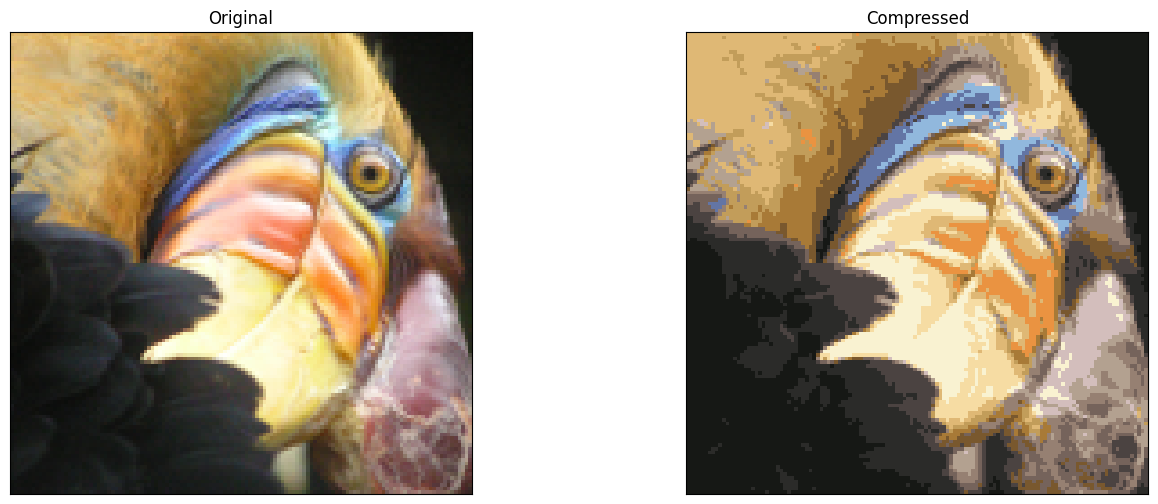

In [7]:
def load_image_data(file_path):
    return scipy.io.loadmat(file_path)['A']

def flatten_image_data(image_data):
    #Flat matrix of RGB in array of RGB
    return image_data.reshape(128*128, 3)

def perform_kmeans_clustering(image_data_flat):
    kmeans = KMeans(n_clusters=16)
    kmeans.fit(image_data_flat)
    return kmeans

def create_compressed_image_data(compression_colors, compression_prediction):
    # Create new image data, by replacing pixels rgbs by cluster centroid rgb
    compressed_image_data = compression_colors[compression_prediction]
    return np.around(compressed_image_data).astype(int).reshape(128, 128, 3)

def display_images(original_image, compressed_image):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].set_title("Original")
    ax[0].imshow(original_image)
    ax[1].set_title("Comprimido")
    ax[1].imshow(compressed_image)

# Main code below
image_data = load_image_data("./data/bird_small.mat")

image_data_flat = flatten_image_data(image_data)

compression_kmeans = perform_kmeans_clustering(image_data_flat)
compression_colors = compression_kmeans.cluster_centers_
compression_prediction = compression_kmeans.predict(image_data_flat)

compressed_image = create_compressed_image_data(compression_colors, compression_prediction)

display_images(image_data, compressed_image)